In [26]:
# import neccessary tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import os
import requests

%matplotlib inline

In [27]:
    # import envs
    
from dotenv import load_dotenv
load_dotenv()

True

In [28]:
    # get alpaca keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [29]:
    # creating alpaca api object
    
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [30]:
    # set api keys

api_key = os.getenv("ALPACA_API_KEY", "ALPACA_SECRET_KEY")

## Collect Crypto Prices 

In [31]:
# creating variables for crypto currencies

my_btc = 1.2
my_eth = 5.3

In [32]:
    # get url for btc

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

In [33]:
    # request info from url for json

btc_response = requests.get(btc_url).json()

In [34]:
    # get the price in CAD from json file

btc_response['data']['1']['quotes']['CAD']['price']

48944.7901

In [35]:
    # get url for eth
    
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [36]:
    # request info from url for json file

eth_response = requests.get(eth_url).json()

In [37]:
    #  get the price in CAD from json file
    
eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

3150.926355

## Investment Data SPY & AGG

In [38]:
# create variables for SPY stocks and AGG bonds

my_agg = 200
my_spy = 50

In [39]:
# Set timeframe to '1D'

timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.

start_date = pd.Timestamp("2016-06-09", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-09", tz="America/New_York").isoformat()

# Set the ticker information

tickers = ["AGG", "SPY"]

# Get 5 year's worth of historical price data

investment_data_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data

investment_data_ticker.tail()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2021-06-03 00:00:00-04:00  114.31  114.46  114.21  114.210  3270096  417.87   
2021-06-04 00:00:00-04:00  114.39  114.67  114.22  114.665  4334878  420.75   
2021-06-07 00:00:00-04:00  113.97  114.64  113.97  114.595  3639918  422.59   
2021-06-08 00:00:00-04:00  114.84  114.87  114.78  114.820  3951702  423.11   
2021-06-09 00:00:00-04:00  115.43  115.43  114.97  115.050  3418086  423.18   

                                                               
                             high       low   close    volume  
time                                                           
2021-06-03 00:00:00-04:00  419.99  416.2800  418.86  51582905  
2021-06-04 00:00:00-04:00  422.92  418.8422  422.57  45129316  
2021-06-07 00:00:00-04:00  422.78  421.1900  422.23  41442963  
2021-06-08 00:00:00-04:00  423.21  420.3200  422.27  40131441  
2021-06-09 00:00:00-04:00  423.26  421.4100  421.62  38368598

In [40]:
# Create and empty DataFrame for closing prices

data_ticker= pd.DataFrame()

# Fetch the closing prices for all the tickers

for ticker in tickers:
    data_ticker[ticker] = investment_data_ticker[ticker]["close"]

# Drop the time component of the date

data_ticker.index = investment_data_ticker.index.date

# Display sample data
data_ticker.head()

,AGG,SPY
2017-06-20,109.975,243.04
2017-06-21,109.980,242.95
2017-06-22,110.050,242.83
2017-06-23,110.070,243.16
2017-06-26,110.160,243.27


In [41]:
    # calculate closing sum

closing_AGG = data_ticker["AGG"].sum()
closing_SPY = data_ticker["SPY"].sum()

In [42]:
    # round sum to two decinal places

closing_AGG.round(2)

111381.6

In [43]:
    # round sum to two decimal places

closing_SPY.round(2)

301019.53

## Savings Health Analasys.

In [44]:
# creating monthly income variable

monthly_income = 12000

In [45]:
# calculate sum of crypto and shares

crypto_sum = (btc_response['data']['1']['quotes']['CAD']['price'])+(eth_response["data"]["1027"]["quotes"]["CAD"]["price"])
crypto_sum


52095.716455

In [46]:
shares_sum = (closing_AGG.round(2))+(closing_SPY.round(2))
shares_sum

412401.13

In [47]:
# initialise data of lists.
data = {"Amount":[crypto_sum, shares_sum]
        }
  
# Creates pandas DataFrame.
df_savings = pd.DataFrame(data, index =["crypto",
                               "shares"])
  
# print the data
df_savings

,Amount
crypto,52095.716455
shares,412401.130000


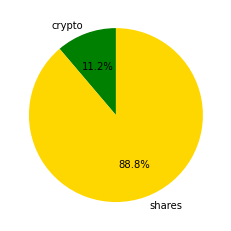

In [48]:
# plotting a pie chart

import matplotlib.pyplot as plt
import numpy as np

labels = df_savings.index
colors = [ "green", "gold"]
plt.pie(df_savings["Amount"], labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [49]:
# create conditional statements for emergency fund

emergency_fund = 36000

In [50]:
# print conditional statements

crypto_savings = 48305.173345
shares_savings = 412398.19


if crypto_savings > emergency_fund:
  print(" congratulations you have enough money in this fund")
elif emergeycy_fund == crypto_savings:
  print("congratulations you have reached your financial goals")
else:
  print("you are almost at yor financial goal you only need")

 congratulations you have enough money in this fund


## Monte Carlo Simulation

In [51]:
# Configure a Monte Carlo simulation to forecast thirty years cumulative returns

MC_even_dist = MCSimulation(
    portfolio_data = investment_data_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2017-06-20 00:00:00-04:00  109.85  110.0300  109.80  109.975  2010628   
2017-06-21 00:00:00-04:00  109.88  110.0400  109.88  109.980  1085301   
2017-06-22 00:00:00-04:00  110.06  110.0947  109.95  110.050  1295361   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.98  110.070  1101304   
2017-06-26 00:00:00-04:00  110.19  110.2400  110.13  110.160  1364100   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-06-20 00:00:00-04:00          NaN  244.25  244.26  242.990  243.04   
2017-06-21 00:00:00-04:00     0.000045  243.43  243.59  242.410  242.95   
2017-06-22 00:00:00-04:00     0.000636  242.97  243.53  242.640  242.83   
2017-06-23 00:00:00-04:00     0.000182  242.91  243.51  242.470  243.16   
2017-06-26 00:00:00-04:00     0.000818  243.89  244.38  243.045  243.27   

                                                  
                             volume daily_return  
time                                              
2017-06-20 00:00:00-04:00  39203167          NaN  
2017-06-21 00:00:00-04:00  42746920    -0.000370  
2017-06-22 00:00:00-04:00  32991335    -0.000494  
2017-06-23 00:00:00-04:00  45792641     0.001359  
2017-06-26 00:00:00-04:00  43153677     0.000452

# Plot the simulation results

In [52]:
# Run a Monte Carlo simulation to forecast thirty years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992096,0.987836,1.009296,1.000680,0.993321,0.982622,1.004095,0.997440,0.999460,1.011197,...,0.978965,0.998997,1.008012,0.996271,0.991791,0.989395,1.000849,1.003652,1.006424,0.997620
2,0.997744,0.971414,1.006743,1.003951,0.984615,0.976576,1.005046,0.992658,0.992372,1.007549,...,0.990357,1.015507,1.017237,0.985153,0.997738,1.002992,0.993795,1.001052,1.000261,0.996000
3,0.994855,0.982765,1.005843,1.000582,0.982652,0.973051,1.015495,0.990821,0.999231,1.007882,...,0.977878,1.013436,1.028423,0.970188,1.004101,0.997434,0.988960,1.010436,1.000272,0.972931
4,1.005504,0.985696,1.013521,1.012551,0.989314,0.973983,1.021884,0.990045,1.006151,1.000054,...,0.975581,1.010729,1.037757,0.978245,1.007874,0.995300,1.002308,1.022380,1.005623,0.964811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.326970,10.770108,12.234952,7.182780,61.090267,6.506382,39.473543,37.517059,16.985478,28.220990,...,16.882933,11.723986,26.658531,19.040313,13.478287,14.154199,11.387551,9.029711,8.120588,9.605253
7557,9.404550,10.691362,12.296005,7.257740,60.325082,6.487691,38.968560,37.574784,17.155093,27.949330,...,17.107066,11.951964,26.763394,18.882059,13.400880,14.001502,11.356843,9.025390,8.259530,9.594733
7558,9.478527,10.645128,12.289554,7.246106,59.653299,6.415065,38.908902,37.517963,17.043507,27.906040,...,17.193230,11.972080,26.591935,18.794014,13.389329,14.031583,11.390531,8.966311,8.301042,9.569836
7559,9.384883,10.656828,12.313358,7.220811,59.505401,6.448530,39.234579,37.266025,16.816674,27.847714,...,16.975007,11.822982,27.087358,18.810711,13.507730,13.991816,11.555920,9.005163,8.234473,9.563363


# Visualizing results by ploting

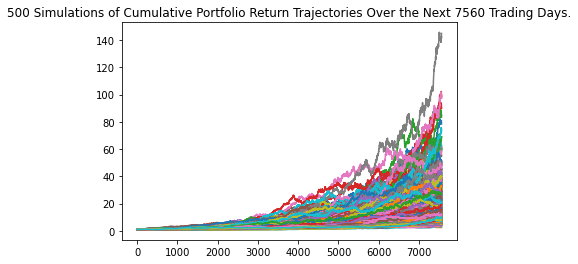

In [53]:
    # plot of thirty year simulations

line_plot = MC_even_dist.plot_simulation() 

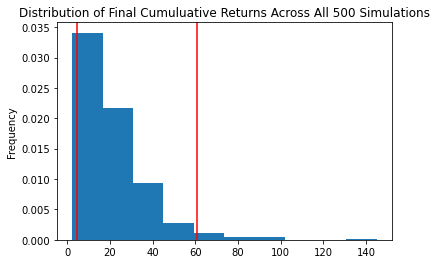

In [54]:
    # Plot probability distribution and confidence intervals

dist_plot = MC_even_dist.plot_distribution()  

## Retirement analasys

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             21.294952
std              16.061263
min               2.334824
25%              10.420718
50%              16.995088
75%              27.599895
max             144.945104
95% CI Lower      4.688840
95% CI Upper     60.679175
Name: 7560, dtype: float64


# Determine upper and lower confidence intervals 

In [56]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*20000,2)
even_ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $93776.79 and $1213583.51.


In [57]:
# Determine intervals with 50% increase on initial investment
even_ci_lower = round(even_tbl[8]*30000,2)
even_ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 30 years will end within in the range of $140665.19 and $1820375.26.
